# Principle Component Analysis

### PCA Algorithm
Be able to explain this for the exam:
Some data is often redundant due to the correlations between variables. So, we want to reduce this redundancy. We essentially want to reduce our data from high dimensionality to low dimensionality. We might also want to extract features for a machine learning algorithm, or be able to visualize the data more reliably.

**1 Standardize the data**
Calculate the mean of each variable and subtract this mean from all the data records in the associated variable. Should probably also divide by the standard deviation.

**2 Calculate the covariance matrix**
Measure the relationships between pairs of variables, determine the variance and covariance between variables.

**3 Calculate the eigenvalues and eigenvectors of the covariance matrix**
Eigenvectors represent the direction of maximum variance (what linear combination of original covariance variables gives max variance) in the data while eigenvalues represent the amount of variance explained by each eigenvector.

**4 Sort the eigenvalues from the largest to the smallest**
The eigenvector that corresponds to the highest eigenvalue is determined as the first principal component of the dataset.

**5 Reduce the dimensionality**
The Principal Components with less significance are ignored.

**6 Transform and reconstruct the dataset**
The transformed data can be reconstructed into the original feature space.


In [3]:
data = [
    {"X1": 2.5, "X2": 2.4},
    {"X1": 0.5, "X2": 0.7},
    {"X1": 2.2, "X2": 2.9},
    {"X1": 1.9, "X2": 2.2},
    {"X1": 3.1, "X2": 3},
    {"X1": 2.3, "X2": 2.7},
    {"X1": 2, "X2": 1.6},
    {"X1": 1, "X2": 1.1},
    {"X1": 1.5, "X2": 1.6},
    {"X1": 1.1, "X2": 0.9},
]

import pandas as pd
import matplotlib.pyplot as plt
df = pd.DataFrame(data)
print(df)

    X1   X2
0  2.5  2.4
1  0.5  0.7
2  2.2  2.9
3  1.9  2.2
4  3.1  3.0
5  2.3  2.7
6  2.0  1.6
7  1.0  1.1
8  1.5  1.6
9  1.1  0.9


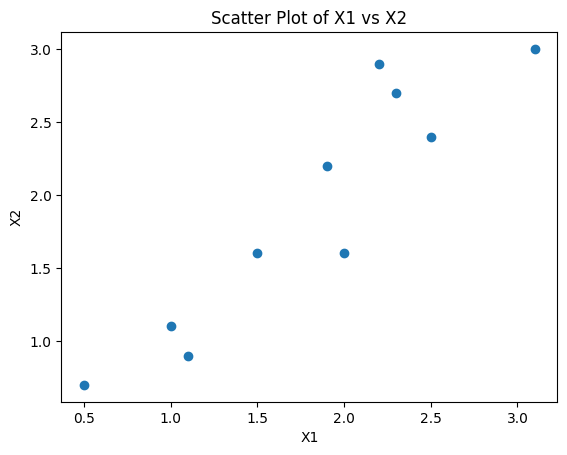

In [7]:
# Plot the data
plt.scatter(df['X1'], df['X2'])
plt.title('Scatter Plot of X1 vs X2')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

The scatter plot seems to suggest that the diagonal would be a better primary axis as it captures the most important variance of the data records. Since not all the data records are on the diagonal but instead scattered around it, we can expect that the second highest variability of these data records will be orthogonal to the diagonal axis. We can say that the first principal component is expected to be the diagonal and the second principal component is expected to be the axis orthogonal to the diagonal.

We could reduce the variables by using only the new diagonal axis and throwing away the axis orthogonal to it.

### Step 1: Standardize the data

In [10]:
mean_X1 = df['X1'].mean()
mean_X2 = df['X2'].mean()
std_X1 = df['X1'].std()
std_X2 = df['X2'].std()
print(std_X1)

df['X1_std'] = (df['X1'] - mean_X1) / std_X1
df['X2_std'] = (df['X2'] - mean_X2) / std_X2

print(df)

0.7852105167122736
    X1   X2    X1_std    X2_std
0  2.5  2.4  0.878745  0.578857
1  0.5  0.7 -1.668342 -1.429422
2  2.2  2.9  0.496682  1.169527
3  1.9  2.2  0.114619  0.342589
4  3.1  3.0  1.642872  1.287661
5  2.3  2.7  0.624036  0.933259
6  2.0  1.6  0.241973 -0.366216
7  1.0  1.1 -1.031570 -0.956886
8  1.5  1.6 -0.394799 -0.366216
9  1.1  0.9 -0.904216 -1.193154


### Step 2: Calculate the Covariance Matrix
The equation to calculate the covariance is given as follows:

$$c_{ij} = \frac{1}{N-1}\sum_{k = 1}^{N}(x_{i} - \bar{x_{i}})_{k}(x_{j} - \bar{x_{j}})_{k}$$

So, for example

$$c_{11} = \frac{1}{N-1}\sum_{k = 1}^{N}(x_{1} - \bar{x_{1}})_{k}^{2}$$

and

$$c_{12} = \frac{1}{N-1}\sum_{k = 1}^{N}(x_{1} - \bar{x_{1}})_{k}(x_{2} - \bar{x_{2}})_{k}$$

We can calculate this in python as follows:

In [12]:
cov_matrix = df[['X1', 'X2']].cov()
print(cov_matrix)

          X1        X2
X1  0.616556  0.615444
X2  0.615444  0.716556


### Step 3: Calculate the eigenvalues and eigenvectors
Let the covariance matrix be called $C$. We want to transform this matrix so that it is a matrix in its own eigenspace. In other words, we want to find the eigenvalues and eigenvectors of this matrix in order to represent the covariance in an eigenspace, giving us orthogonal components that only vary along their components, allowing for dimensionality reduction. Any matrix that has the following property:

$$ C\vec{x} = \lambda \vec{x} $$

essentially transforms the vector $\vec{x}$ along its own component; i.e., the transformation simply scales the vector. We therefore need to solve this equation to find the vectors $\vec{x}$ such that

$$ (C - \lambda \cdot I) \vec{x} = \vec{0} $$

where $\vec{x}$ is not just the trivial solution \vec{x} = \vec{0}. This is only satisfied if the matrix $(C - \lambda \cdot I)$ is composed of linearly dependent columns/rows, namely:

$$ det(C - \lambda \cdot I) = 0 $$

which would give us a characteristic polynomial in $\lambda$. It is these values of $\lambda$ which provide the eigenvalues, which can then be plugged back into the first equation above and solved to yield the eigenvectors. In fact, the matrix $S$ formed by the eigenvectors is related to the eigenvalues through diagonalization of the matrix $C$ as follows: $D = S^{-1}CS$ where $D$ is the diagonal matrix of eigenvalues. This shows that the eigenvalues provide a new basis for the covariance data where the eigenvector matrix is a change of basis matrix. In other words, to get the data into a new form, we use the change of basis matrix $S$ to transform to the new eigenbasis, perform the covariance transformation $C$, then return back to the original basis with $S^{-1}$.

$$C - \lambda \cdot I = \begin{pmatrix}0.616556-\lambda, 0.615444 \\ 0.615444, 0.716556 - \lambda \end{pmatrix}$$

which leads to the characteristic polynomial:

$$\lambda^{2} - 1.333\lambda + 0.063 = 0$$

These can be calculated in python with numpy

In [13]:
import numpy as np
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix);
print("Eigenvalues:", eigenvalues)

Eigenvalues: [0.0490834  1.28402771]


These eigenvalues represent the variance explained by each principal component, i.e, the diagonal and its orthogonal line in the example above. The larger the eigenvalue, the more variance that component explains in the data.

The eigenvectors (or principal components) are calculated for each eigenvalue in turn. Starting with the largest:

$$(C - \lambda_{1} \cdot I)\vec{x_{PC1}} = \vec{0} $$
$$ \begin{pmatrix} -0.6675, 0.6154 \\ 0.6154, -0.5675 \end{pmatrix} \begin{pmatrix} x_{PC1_1} \\ x_{PC1_2} \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \end{pmatrix}$$

This leads to $x_{PC1_1} = 1$ and $x_{PC1_2} = 1.084$. Next, normalize these by taking the square root of the sum of squares of both values and using that result to divide the vector, creating a unit vector. We get the following results, as calculated by Python:

In [14]:
print("Eigenvectors:", eigenvectors)

Eigenvectors: [[-0.73517866 -0.6778734 ]
 [ 0.6778734  -0.73517866]]


These two eigenvectors are orthogonal (i.e., they are at right-angles on the chart above), which can be demonstrated by taking the dot product of the two eigenvecots and showing that they are equal to zero.

In [16]:
eigenvector_1 = eigenvectors[:, 0]
eigenvector_2 = eigenvectors[:, 1]
dot_product = np.dot(eigenvector_1, eigenvector_2)
print("The dot product of the eigenvectors is: ", dot_product)

The dot product of the eigenvectors is:  -1.8337180666905926e-17


which is practically zero.

### Step 4: Formulate the principle components

The first principle component is the eigenvector that corresponds to the eigenvalue with the highest value. We can determine the order of PCs according to their eigenvalues from highest to lowest. This can be done with the following equation that calculates the percentage of variance each principal component represents:

$$ H_{PC_{i}} = \frac{\lambda_{i}}{\lambda_{1} + ... + \lambda_{M}} \cdot 100% $$

In [17]:
total_variance = np.sum(eigenvalues)
variance_percentages = (eigenvalues / total_variance) * 100
print("Percentage of variance for each principal component: ")
for i, variance in enumerate(variance_percentages):
    print(f"Principal Component {i+1}: {variance:.2f}%")

Percentage of variance for each principal component: 
Principal Component 1: 3.68%
Principal Component 2: 96.32%


### Step 5: Dimensionality Reduction
We can decide to ignore the principal components with less significance, i.e., those that have a lower percentage of the variance. This reduces our dataset to a smaller set of principal components.

### Step 6: Transforming the original dataset
The technique to do this is to create the transformation matrix from the eigenvectors and transform the convariance matrix through matrix multiplication. It is important to note that the transformed data show the same relation. The only difference is the transformation so that the axes are the principal components and not the variables X1 and X2. - Though not sure about this. I can see the data in the textbook shows that the variance of the new matrix is wider for the first component and narrower for the second component, but it doesn't seem useful.

In [21]:
cov_transformed = np.dot(eigenvectors, cov_matrix)
print(cov_transformed)

[[-0.8704719  -0.93819557]
 [-0.03451501 -0.10960293]]
